In [1]:
from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))
%load_ext autotime
import os
import sys
sys.path.insert(0, os.path.abspath('../src/'))

time: 314 µs (started: 2021-09-02 12:50:59 +02:00)


In [2]:
import utils
import improve_data_quality
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", 10, "display.max_columns", None) #show 10 rows and 5 columns

time: 897 ms (started: 2021-09-02 12:50:59 +02:00)


In [3]:
data_file = "../data/data.csv"
df = utils._to_DataFrame(data_file)
meta_data = utils.get_metadata(df)


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (14,15,16,23,24,25,26,28,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


time: 1.08 s (started: 2021-09-02 12:51:00 +02:00)


In [4]:
df

,Unnamed: 0,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,0,1139246.0,66000.0,999089.0,3157,121,3,2004,68.0,Low,11/16/2006 0:00,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,NaN,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1,1139248.0,57000.0,117657.0,77,121,3,1996,4640.0,Low,3/26/2004 0:00,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,NaN,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,2,1139249.0,10000.0,434808.0,7009,121,3,2001,2838.0,High,2/26/2004 0:00,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,NaN,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1139251.0,38500.0,1026470.0,332,121,3,2001,3486.0,High,5/19/2011 0:00,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,NaN,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1139253.0,11000.0,1057373.0,17311,121,3,2007,722.0,Medium,7/23/2009 0:00,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,NaN,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1417929.0,93500.0,26366.0,3357,132,6,1990,NaN,NaN,2/24/1994 0:00,12G,12,G,NaN,NaN,NaN,Motorgrader - 130.0 to 145.0 Horsepower,North Carolina,NaN,Motor Graders,No,EROPS w AC,NaN,NaN,NaN,NaN,None or Unspecified,NaN,None or Unspecified,12',Low Profile,No,Base + 1 Function,Yes,None or Unspecified,Yes,Sideshift & Tip,"15.5""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,99996,1417930.0,47000.0,1412330.0,3357,132,9,1990,NaN,NaN,12/2/2010 0:00,12G,12,G,NaN,NaN,NaN,Motorgrader - 130.0 to 145.0 Horsepower,South Carolina,NaN,Motor Graders,No,EROPS w AC,NaN,NaN,NaN,NaN,None or Unspecified,NaN,None or Unspecified,14',Low Profile,No,Base + 1 Function,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,"17.5""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99997,99997,1417931.0,47000.0,1412330.0,3357,132,9,1990,NaN,NaN,5/20/2010 0:00,12G,12,G,NaN,NaN,NaN,Motorgrader - 130.0 to 145.0 Horsepower,South Carolina,NaN,Motor Graders,No,EROPS w AC,NaN,NaN,NaN,NaN,None or Unspecified,NaN,None or Unspecified,14',Low Profile,No,Base + 1 Function,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,"17.5""",NaN,NaN

time: 37.1 ms (started: 2021-09-02 12:51:01 +02:00)


##  clean duplication

In [5]:
df_c, duplicate = utils._is_duplicated(df)

time: 539 ms (started: 2021-09-02 12:51:02 +02:00)


In [6]:
df_c.shape

(99990, 54)

time: 1.57 ms (started: 2021-09-02 12:55:16 +02:00)


## uniqueness verification

In [7]:
uniqueness_ratio = utils._is_unique(df, col_name="Unnamed: 0")
uniqueness_ratio

1.0

time: 480 ms (started: 2021-09-01 10:11:07 +02:00)


In [8]:
uniqueness_ratio = utils._is_unique(df, col_name="saledate")
uniqueness_ratio

0.03587358735873587

time: 480 ms (started: 2021-09-01 10:11:09 +02:00)


## Verify none 

In [9]:
none_ratio = utils._is_none(df, col_name="ProductGroup")
none_ratio

1.0

time: 514 ms (started: 2021-09-01 10:08:19 +02:00)


In [8]:
none_ratio = utils._is_none(df, col_name="SalesID")
none_ratio

0.00047004700470047007

time: 495 ms (started: 2021-09-01 09:45:07 +02:00)


In [9]:
len(df["SalesID"].isnull())

100000

time: 2.92 ms (started: 2021-09-01 09:45:09 +02:00)


In [10]:
aa = df["SalesID"].isnull()
bb = df["SalesID"][aa]
bb

341     NaN
1905    NaN
8853    NaN
11457   NaN
21829   NaN
         ..
93697   NaN
94517   NaN
96574   NaN
97208   NaN
98614   NaN
Name: SalesID, Length: 47, dtype: float64

time: 5.6 ms (started: 2021-09-01 09:45:10 +02:00)


## proba_model

In [15]:
column = 'YearMade'
s_mean = df_c[column].mean()
s_std = df_c[column].std()
#print(s_mean, s_std)
ind = utils.proba_model(col=df_c[column], mean=s_mean, std= s_std, tresh=3)

1931.4003700370038 247.88276853230303
time: 21.3 ms (started: 2021-09-02 22:11:28 +02:00)


In [16]:
print(s_mean -3*s_std, s_mean +3*s_std)

1187.7520644400947 2675.048675633913
time: 455 µs (started: 2021-09-02 22:12:05 +02:00)


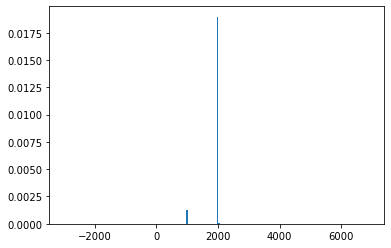

time: 432 ms (started: 2021-09-02 22:15:42 +02:00)


In [18]:
plt.hist(df_c[column], bins=200, density=True)
plt.show()

In [11]:
df.loc[40180]

Unnamed: 0                  40180
SalesID               1.27994e+06
SalePrice                   20000
MachineID             1.53276e+06
ModelID                      3218
                         ...     
Backhoe_Mounting              NaN
Blade_Type                    NaN
Travel_Controls               NaN
Differential_Type        Standard
Steering_Controls    Conventional
Name: 40180, Length: 54, dtype: object

time: 3.74 ms (started: 2021-09-01 16:47:00 +02:00)


In [54]:
df_c[column][ind]

88       24794.0
90       23838.0
190      26986.0
216      29374.0
345      28112.0
          ...   
99995        NaN
99996        NaN
99997        NaN
99998        NaN
99999        NaN
Name: MachineHoursCurrentMeter, Length: 74164, dtype: float64

time: 5.96 ms (started: 2021-09-01 16:37:03 +02:00)


In [55]:
df_c[column][df_c[column]<0]

Series([], Name: MachineHoursCurrentMeter, dtype: float64)

time: 4.84 ms (started: 2021-09-01 16:39:21 +02:00)


In [9]:
df_c[column][ind[df_c[column][ind]>1000]]

3409     5954
6436     3639
7398     3031
7533     5984
8905     3717
         ... 
72000    6868
73002    3031
75016    4157
93284    4806
97395    5865
Name: YearMade, Length: 25, dtype: int64

time: 6.31 ms (started: 2021-09-01 10:12:47 +02:00)


<function matplotlib.pyplot.show(close=None, block=None)>

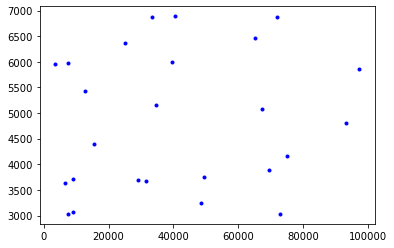

time: 115 ms (started: 2021-09-01 10:04:05 +02:00)


In [42]:
plt.plot(df_c[column][ind[df_c[column][ind]>1000]], 'b.')
plt.show

In [11]:
ind

Int64Index([    9,    21,    33,    35,    36,    39,    46,    54,    61,
               64,
            ...
            84748, 87081, 88727, 89341, 90878, 93284, 97395, 97976, 97982,
            97983],
           dtype='int64', length=6133)

time: 2.36 ms (started: 2021-09-01 10:16:12 +02:00)


In [12]:
df_c.loc[ind]

,Unnamed: 0,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
9,9,1139275.0,65000.0,1016474.0,3883,121,3,1000,20700.0,Medium,8/9/2007 0:00,988B,988,B,NaN,NaN,Large,Wheel Loader - 350.0 to 500.0 Horsepower,Florida,NaN,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
21,21,1139333.0,34500.0,999192.0,3350,121,3,1000,16328.0,Medium,10/19/2006 0:00,120G,120,G,NaN,NaN,NaN,Motorgrader - 45.0 to 130.0 Horsepower,Nevada,NaN,Motor Graders,No,EROPS,NaN,NaN,NaN,NaN,Powershift,NaN,Yes,None or Unspecified,None or Unspecified,No,Base + 1 Function,None or Unspecified,None or Unspecified,Yes,Sideshift & Tip,"13""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,33,1139369.0,14000.0,1050658.0,1918,121,3,1000,0.0,NaN,1/28/2010 0:00,750BLT,750,B,NaN,LT,Medium,"Track Type Tractor, Dozer - 130.0 to 160.0 Hor...",Michigan,NaN,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Hydrostatic,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,NaN,NaN
35,35,1139382.0,10000.0,1068548.0,112,121,3,1000,3981.0,Low,6/9/2011 0:00,95ZII,95,Z,II,NaN,Medium,Wheel Loader - 275.0 to 350.0 Horsepower,Arkansas,NaN,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,29.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
36,36,1139390.0,8250.0,1011114.0,7110,121,3,1000,0.0,NaN,5/19/2011 0:00,416,416,NaN,NaN,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Mississippi,NaN,Backhoe Loaders,Two Wheel Drive,OROPS,None or Unspecified,None or Unspecified,No,Standard,Standard,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93284,93284,1404630.0,18000.0,891159.0,7110,132,13,4806,NaN,NaN,11/23/1996 0:00,416,416,NaN,NaN,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Tennessee,NaN,Backhoe Loaders,Four Wheel Drive,EROPS,None or Unspecified,None or Unspecified,No,Standard,Standard,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97395,97395,1413510.0,22000.0,38480.0,3538,132,7,5865,NaN,NaN,9/5/2002 0:00,416C,416,C,NaN,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Alabama,NaN,Backhoe Loaders,Two Wheel Drive,OROPS,None or Unspecified,None or Unspecified,No,Standard,Standard,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97976,97976,1414994.0,17500.0,1184066.0,4138,132,22,1000,NaN,NaN,10/14/2004 0:00,D7F,D7,F,NaN,NaN,Large,"Track Type Tractor, Dozer - 190.0 to 260.0 Hor...",Wisconsin,NaN,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,NaN,NaN
97982,9798

time: 45.8 ms (started: 2021-09-01 10:17:09 +02:00)


In [44]:
type_array = np.asarray(df_c[column])
type_array [ind]

array([1000, 1000, 1000, ..., 1972, 1973, 1973])

time: 23.2 ms (started: 2021-09-01 10:05:46 +02:00)


<function matplotlib.pyplot.show(close=None, block=None)>

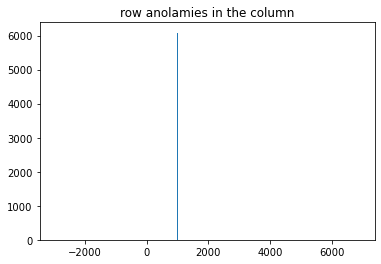

time: 394 ms (started: 2021-09-01 09:48:25 +02:00)


In [16]:
plt.hist(df_c[column][ind], bins=200)
plt.title("row anolamies in the column")
plt.show()

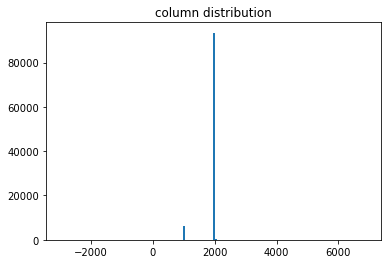

time: 283 ms (started: 2021-09-01 09:49:19 +02:00)


In [18]:
plt.hist(df_c[column], bins=200)
plt.title("column distribution")
plt.show()

In [ ]:
plt.hist(df_trunc[column], bins=200)
#plt.hist(df_col_trunc,  bins=200, color='r')
plt.show()
plt.hist(df_col_trunc,  bins=200, color='r')
plt.show

In [ ]:
a

In [ ]:
data = np.unique(df["YearMade"])

In [ ]:
from sklearn.cluster import DBSCAN


outlier_detection = DBSCAN(eps = .2,  metric="euclidean", min_samples = 2, n_jobs = -1)
clusters = outlier_detection.fit_predict(np.asarray(df["YearMade"]).reshape(-1, 1))
np.unique(clusters)

In [ ]:
clusters

In [ ]:
df_PSale = df['YearMade']
List_PSale = np.asarray(df_PSale[df_PSale.notna()])
tree_std = np.mean(List_PSale) - 3*np.std(List_PSale)
t_std = np.mean(List_PSale) + 3*np.std(List_PSale)
plt.hist(List_PSale[(df_PSale > tree_std)*(df_PSale < t_std)], bins = 200)
plt.show()

## Non in line 

In [6]:
def _is_duplicated(df):
    """Find duplicated row and return dataframe without the duplication

    Args:
        df (pandas.DataFrame): data frame

    Returns:
        duplicated_row: the duplicated rows
        df_clean: the DataFrame without the duplicated rows
    """
    df_new = df.drop(["Unnamed: 0"], axis=1)
    duplicated_row = df[df_new.duplicated()]  # duplicated row
    df_clean = df[~df_new.duplicated()]  # without duplication row
    return df_clean, duplicated_row

time: 520 µs (started: 2021-09-01 13:46:12 +02:00)


In [41]:
def _row_is_none(df, thresh_row_1=0.7, thresh_row_2=0.5, thresh_col=0.8):
    df_clean, _ = _is_duplicated(df)
    
    mean_none_row_1 = df_clean.isnull().mean(axis=1) #mean(none) in each row of df_c
    list_drop_row_1 = mean_none_row_1[mean_none_row_1>=thresh_row_1]
    index_1 = list_drop_row_1.index #index of drop rows
    print(index_1)
    
    mean_none_col = df_clean.isnull().mean(axis=0) #mean(none) in each column of df_c
    index_col_drop = mean_none_col[mean_none_col>=thresh_col].index #list of names of the column with none mean>thresh_col
    df_drop_col = df_clean.drop(labels=index_col_drop, axis=1) #drop column with mean(none)>thresh_col from df_clean
    mean_none_row_2 = df_drop_col.isnull().mean(axis=1) #mean number of none in each row
    list_drop_row_2 = mean_none_row_2[mean_none_row_2>=thresh_row_2] #drop row having mean(none)>thresh_row over df_drop_col
    index_2 = list_drop_row_2.index
    print(index_2)
    
    ind = index_1 & index_2
    
    return ind
    

time: 764 µs (started: 2021-09-01 14:14:33 +02:00)


In [51]:
index_drop = _row_is_none(df, thresh_row_1=0.7, thresh_row_2=0.5, thresh_col=0.75)
index_drop

Int64Index([27292, 29279, 31527, 35305, 35388, 47474, 58391, 84351, 87304,
            89993, 96696, 96946, 97153, 97440],
           dtype='int64')
Int64Index([35305], dtype='int64')


Int64Index([35305], dtype='int64')

time: 766 ms (started: 2021-09-01 14:18:52 +02:00)


In [40]:
df_c.loc[35305].isnull().sum()

40

time: 2.78 ms (started: 2021-09-01 13:59:16 +02:00)


In [52]:
~[True, False]

TypeError: bad operand type for unary ~: 'list'

time: 8.58 ms (started: 2021-09-01 14:36:29 +02:00)


In [19]:
mean_none_row_1 = df_c.mean(axis=1) #mean(none) in each row of df_c
list_drop_row_1 = mean_none_row_1[mean_none_row_1>=0.75]
#index_1 = list_drop_row_1.index #index of drop rows
mean_none_row_1

0        245520.888889
1        146749.222222
2        177336.777778
3        245574.111111
4        247532.666667
             ...      
99995    205409.375000
99996    372843.000000
99997    372843.250000
99998    372968.750000
99999    351398.375000
Length: 99990, dtype: float64

time: 382 ms (started: 2021-09-01 13:53:14 +02:00)


In [44]:
mean_none_col = df_c.isnull().mean(axis=0)
#df_c.isnull().sum(axis=1)/df_c.shape[1] #check if it's really the mean
print(mean_none_col)
mean_none_col[mean_none_col>0.8]

Unnamed: 0           0.000000
SalesID              0.000470
SalePrice            0.000640
MachineID            0.000500
ModelID              0.000000
                       ...   
Backhoe_Mounting     0.772337
Blade_Type           0.771887
Travel_Controls      0.771867
Differential_Type    0.836194
Steering_Controls    0.836224
Length: 54, dtype: float64


fiModelSeries        0.924592
fiModelDescriptor    0.841194
ProductGroup         1.000000
Blade_Extension      0.940844
Blade_Width          0.940844
                       ...   
Thumb                0.821902
Pattern_Changer      0.821942
Grouser_Type         0.821952
Differential_Type    0.836194
Steering_Controls    0.836224
Length: 21, dtype: float64

time: 111 ms (started: 2021-09-01 10:52:40 +02:00)


In [96]:
deleted_col = mean_none_col[mean_none_col>0.8].index
deleted_col

Index(['fiModelSeries', 'fiModelDescriptor', 'ProductGroup', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Pushblock',
       'Scarifier', 'Tip_Control', 'Coupler_System', 'Grouser_Tracks',
       'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width',
       'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type',
       'Differential_Type', 'Steering_Controls'],
      dtype='object')

time: 3.78 ms (started: 2021-09-01 11:31:24 +02:00)


In [97]:
df_dropped_col = df.drop(labels=deleted_col, axis=1)
df_dropped_col

,Unnamed: 0,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,ProductSize,fiProductClassDesc,state,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Hydraulics,Ripper,Tire_Size,Coupler,Backhoe_Mounting,Blade_Type,Travel_Controls
0,0,1139246.0,66000.0,999089.0,3157,121,3,2004,68.0,Low,11/16/2006 0:00,521D,521,D,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN
1,1,1139248.0,57000.0,117657.0,77,121,3,1996,4640.0,Low,3/26/2004 0:00,950FII,950,F,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,2 Valve,NaN,23.5,None or Unspecified,NaN,NaN,NaN
2,2,1139249.0,10000.0,434808.0,7009,121,3,2001,2838.0,High,2/26/2004 0:00,226,226,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,None or Unspecified,NaN,NaN,NaN
3,3,1139251.0,38500.0,1026470.0,332,121,3,2001,3486.0,High,5/19/2011 0:00,PC120-6E,PC120,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,None or Unspecified,NaN,NaN,NaN
4,4,1139253.0,11000.0,1057373.0,17311,121,3,2007,722.0,Medium,7/23/2009 0:00,S175,S175,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,None or Unspecified,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1417929.0,93500.0,26366.0,3357,132,6,1990,NaN,NaN,2/24/1994 0:00,12G,12,G,NaN,Motorgrader - 130.0 to 145.0 Horsepower,North Carolina,Motor Graders,No,EROPS w AC,NaN,NaN,NaN,NaN,None or Unspecified,NaN,Base + 1 Function,None or Unspecified,"15.5""",NaN,NaN,NaN,NaN
99996,99996,1417930.0,47000.0,1412330.0,3357,132,9,1990,NaN,NaN,12/2/2010 0:00,12G,12,G,NaN,Motorgrader - 130.0 to 145.0 Horsepower,South Carolina,Motor Graders,No,EROPS w AC,NaN,NaN,NaN,NaN,None or Unspecified,NaN,Base + 1 Function,None or Unspecified,"17.5""",NaN,NaN,NaN,NaN
99997,99997,1417931.0,47000.0,1412330.0,3357,132,9,1990,NaN,NaN,5/20/2010 0:00,12G,12,G,NaN,Motorgrader - 130.0 to 145.0 Horsepower,South Carolina,Motor Graders,No,EROPS w AC,NaN,NaN,NaN,NaN,None or Unspecified,NaN,Base + 1 Function,None or Unspecified,"17.5""",NaN,NaN,NaN,NaN
99998,99998,1417934.0,48000.0,1412330.0,3357,132,9,1990,NaN,NaN,8/19/2010 0:00,12G,12,G,NaN,Motorgrader - 130.0 to 145.0 Horsepower,South Carolina,Motor Graders,No,EROPS w AC,NaN,NaN,NaN,NaN,None or Unspecified,NaN,Base + 1 Function,None or Unspecified,"17.5""",NaN,NaN,NaN,NaN


time: 53.2 ms (started: 2021-09-01 11:31:31 +02:00)


In [98]:
df.columns

Index(['Unnamed: 0', 'SalesID', 'SalePrice', 'MachineID', 'ModelID',
       'datasource', 'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter',
       'UsageBand', 'saledate', 'fiModelDesc', 'fiBaseModel',
       'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

time: 3.27 ms (started: 2021-09-01 11:31:31 +02:00)


In [99]:
mean_none_row = df_dropped_col.isnull().mean(axis=1)
#df_c.isnull().sum(axis=1)/df_c.shape[1] #check if it's really the mean
mean_none_row

0        0.303030
1        0.272727
2        0.393939
3        0.393939
4        0.393939
           ...   
99995    0.363636
99996    0.363636
99997    0.363636
99998    0.363636
99999    0.363636
Length: 100000, dtype: float64

time: 61.2 ms (started: 2021-09-01 11:31:32 +02:00)


In [100]:
index_1 = mean_none_row[mean_none_row>=0.5].index
df_dropped_col.loc[mean_none_row[mean_none_row>=0.5].index]

,Unnamed: 0,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,ProductSize,fiProductClassDesc,state,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Hydraulics,Ripper,Tire_Size,Coupler,Backhoe_Mounting,Blade_Type,Travel_Controls
10446,10446,1174294.0,39500.0,115257.0,649,121,3,1987,0.0,NaN,10/21/2004 0:00,WA600-1,WA600,NaN,Large,Wheel Loader - 350.0 to 500.0 Horsepower,California,Wheel Loader,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19437,19437,1206461.0,49000.0,1039141.0,16679,121,3,2004,7001.0,High,9/23/2010 0:00,WA250-5,WA250,NaN,NaN,Wheel Loader - 120.0 to 135.0 Horsepower,Texas,Wheel Loader,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27292,27292,1255422.0,20500.0,1317717.0,6793,132,10,1976,NaN,NaN,5/21/1993 0:00,590,590,NaN,NaN,Backhoe Loader - 15.0 to 16.0 Ft Standard Digg...,Mississippi,Backhoe Loaders,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29279,29279,1260428.0,8500.0,1492856.0,3164,132,14,1979,NaN,NaN,9/22/2006 0:00,580C,580,C,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Indiana,Backhoe Loaders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31527,31527,1263854.0,12500.0,1511694.0,3224,132,1,1984,NaN,NaN,4/29/1997 0:00,780B,780,B,NaN,Backhoe Loader - 16.0 + Ft Standard Digging Depth,Tennessee,Backhoe Loaders,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96696,96696,1412197.0,55000.0,658078.0,1276,132,1,1994,NaN,NaN,3/30/2005 0:00,330L,330,NaN,Large / Medium,"Hydraulic Excavator, Track - 33.0 to 40.0 Metr...",Washington,Track Excavators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96899,96899,1412680.0,49000.0,1214948.0,1276,132,3,1995,NaN,NaN,7/25/2002 0:00,330L,330,NaN,Large / Medium,"Hydraulic Excavator, Track - 33.0 to 40.0 Metr...",Unspecified,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96946,96946,1412799.0,58500.0,643521.0,1276,132,2,1996,NaN,NaN,3/14/2002 0:00,330L,330,NaN,Large / Medium,"Hydraulic Excavator, Track - 33.0 to 40.0 Metr...",New Jersey,Track Excavators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97153,97153,1413162.0,33000.0,1339188.0,3538,132,1,1997,NaN,NaN,3/20/2000 0:00,416C,416,C,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Missouri,Backhoe Loaders,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


time: 32.6 ms (started: 2021-09-01 11:31:36 +02:00)


In [101]:
mean_none_row_1 = df_c.isnull().mean(axis=1)
index_2 = mean_none_row_1[mean_none_row_1>=0.7].index
len(index_2)

14

time: 111 ms (started: 2021-09-01 11:31:42 +02:00)


In [102]:
index_1 & index_2

Int64Index([27292, 29279, 31527, 35305, 35388, 47474, 58391, 84351, 87304,
            89993, 96696, 96946, 97153, 97440],
           dtype='int64')

time: 3.08 ms (started: 2021-09-01 11:31:42 +02:00)


In [87]:
mean_none_row_1[mean_none_row_1>=0.7]

27292    0.722222
29279    0.722222
31527    0.703704
35305    0.740741
35388    0.722222
           ...   
89993    0.703704
96696    0.703704
96946    0.703704
97153    0.703704
97440    0.722222
Length: 14, dtype: float64

time: 5.29 ms (started: 2021-09-01 11:28:51 +02:00)


In [41]:
mean_none_col = df_c.isnull().mean(axis=0)
#df_c.isnull().sum(axis=1)/df_c.shape[1] #check if it's really the mean
print(mean_none_col)
mean_none_col[mean_none_col>0.8]

Unnamed: 0           0.000000
SalesID              0.000470
SalePrice            0.000640
MachineID            0.000500
ModelID              0.000000
                       ...   
Backhoe_Mounting     0.772337
Blade_Type           0.771887
Travel_Controls      0.771867
Differential_Type    0.836194
Steering_Controls    0.836224
Length: 54, dtype: float64

time: 108 ms (started: 2021-09-01 10:47:17 +02:00)


## Outlier detection

In [7]:
import improve_data_quality
test_data = improve_data_quality.Data(data_file)


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (14,15,16,23,24,25,26,28,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


time: 58.5 s (started: 2021-09-02 12:55:33 +02:00)


In [ ]:
def imputation_method(self, **params):
        params.setdefault("n_neighbors", 20)
        params.setdefault("weights", "uniform")
        self.data, _ = utils._is_duplicated(self.data)
        list_numeric_col_name = self.get_nbr_col()  # name of numerical column
        numeric_df = self.data[list_numeric_col_name]  # numeric dataframe

        numeric_df = numeric_df.fillna(np.nan)  # fill none with np.nan
        imputer = KNNImputer(params)  # initialize imputation
        numeric_df_imputation = imputer.fit_transform(numeric_df)  # imputation if df
        numeric_df_imputation = pd.DataFrame(numeric_df_imputation)
        return numeric_df_imputation

In [8]:
test_data.set_profile() # find profile of column


time: 55.3 s (started: 2021-09-02 12:56:31 +02:00)


In [9]:
numeric_df = df_c[test_data.get_nbr_col()] #extract numerical column

time: 3.22 ms (started: 2021-09-02 12:57:39 +02:00)


In [10]:
list_numeric_col_name = test_data.get_nbr_col()
list_numeric_col_name

['Unnamed: 0',
 'SalesID',
 'SalePrice',
 'MachineID',
 'ModelID',
 'datasource',
 'auctioneerID',
 'YearMade',
 'MachineHoursCurrentMeter']

time: 2.69 ms (started: 2021-09-02 12:57:51 +02:00)


In [11]:
numeric_df

,Unnamed: 0,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
0,0,1139246.0,66000.0,999089.0,3157,121,3,2004,68.0
1,1,1139248.0,57000.0,117657.0,77,121,3,1996,4640.0
2,2,1139249.0,10000.0,434808.0,7009,121,3,2001,2838.0
3,3,1139251.0,38500.0,1026470.0,332,121,3,2001,3486.0
4,4,1139253.0,11000.0,1057373.0,17311,121,3,2007,722.0
...,...,...,...,...,...,...,...,...,...
99995,99995,1417929.0,93500.0,26366.0,3357,132,6,1990,NaN
99996,99996,1417930.0,47000.0,1412330.0,3357,132,9,1990,NaN
99997,99997,1417931.0,47000.0,1412330.0,3357,132,9,1990,NaN
99998,99998,1417934.0,48000.0,1412330.0,3357,132,9,1990,NaN


time: 10.4 ms (started: 2021-09-02 12:58:34 +02:00)


In [14]:
from sklearn.impute import KNNImputer

list_numeric_col_name = test_data.get_nbr_col()
#nan = np.nan
numeric_df = df_c[list_numeric_col_name]
X = numeric_df.fillna(np.nan)
imputer = KNNImputer(n_neighbors=20, weights="uniform")
numeric_df_2 = imputer.fit_transform(X)
numeric_df_2 = pd.DataFrame(numeric_df_2)

time: 5min 8s (started: 2021-09-02 13:15:58 +02:00)


In [13]:
numeric_df_2.columns = numeric_df.columns
numeric_df_2

,Unnamed: 0,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
0,0.0,1139246.0,66000.0,999089.0,3157.0,121.0,3.0,2004.0,68.00
1,1.0,1139248.0,57000.0,117657.0,77.0,121.0,3.0,1996.0,4640.00
2,2.0,1139249.0,10000.0,434808.0,7009.0,121.0,3.0,2001.0,2838.00
3,3.0,1139251.0,38500.0,1026470.0,332.0,121.0,3.0,2001.0,3486.00
4,4.0,1139253.0,11000.0,1057373.0,17311.0,121.0,3.0,2007.0,722.00
...,...,...,...,...,...,...,...,...,...
99985,99995.0,1417929.0,93500.0,26366.0,3357.0,132.0,6.0,1990.0,3211.90
99986,99996.0,1417930.0,47000.0,1412330.0,3357.0,132.0,9.0,1990.0,1681.30
99987,99997.0,1417931.0,47000.0,1412330.0,3357.0,132.0,9.0,1990.0,1681.30
99988,99998.0,1417934.0,48000.0,1412330.0,3357.0,132.0,9.0,1990.0,1681.30


time: 10.3 ms (started: 2021-09-02 13:03:31 +02:00)


In [88]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=40, contamination=0.002, metric='correlation')
y_pred = clf.fit_predict(np.asarray(numeric_df_2))

time: 3min 29s (started: 2021-09-01 23:36:06 +02:00)


In [89]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

time: 2.85 ms (started: 2021-09-01 23:40:04 +02:00)


In [71]:
emptiness_col = test_data.profile[column]._emptiness

time: 407 µs (started: 2021-09-01 22:38:59 +02:00)


In [ ]:
for column in test_data.get_nbr_col():
    if test_data.profile[column]._emptiness!=0:
        print(test_data.profile[column]._emptiness)
        list_numeric_col_name.remove(column)
list_numeric_col_name

In [ ]:
numeric_df[list_numeric_col_name]

In [ ]:
print(test_data.profile['MachineHoursCurrentMeter']._emptiness)

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=40, contamination=0.002, metric='correlation')
y_pred = clf.fit_predict(np.asarray(numeric_df[list_numeric_col_name]))

In [90]:
y_pred
(y_pred[y_pred==1]).shape

(99790,)

time: 3.53 ms (started: 2021-09-01 23:40:30 +02:00)


In [95]:
numeric_df.loc[y_pred==-1]

,Unnamed: 0,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
1203,1203,1143302.0,34000.0,394864.0,1614,121,3,1000,88981.0
2256,2256,1146777.0,368000.0,1016375.0,8016,121,3,2002,1522.0
3016,3016,1149290.0,312000.0,1056183.0,10473,121,3,2004,2529.0
6597,6597,1161475.0,35000.0,816455.0,13854,121,3,1000,52247.0
6879,6879,1162388.0,9000.0,1060275.0,3883,121,3,1000,141120.0
...,...,...,...,...,...,...,...,...,...
86181,86181,1389432.0,17000.0,1450451.0,3883,132,13,1978,25698.0
86805,86805,1390649.0,66000.0,1285250.0,3883,132,15,1990,39289.0
88838,88838,1394510.0,8500.0,1373594.0,24191,132,4,1961,NaN
91151,91151,1400677.0,517500.0,867208.0,7118,132,2,1988,NaN


time: 16 ms (started: 2021-09-01 23:46:20 +02:00)


In [96]:
numeric_df.loc[y_pred==1]

,Unnamed: 0,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
0,0,1139246.0,66000.0,999089.0,3157,121,3,2004,68.0
1,1,1139248.0,57000.0,117657.0,77,121,3,1996,4640.0
2,2,1139249.0,10000.0,434808.0,7009,121,3,2001,2838.0
3,3,1139251.0,38500.0,1026470.0,332,121,3,2001,3486.0
4,4,1139253.0,11000.0,1057373.0,17311,121,3,2007,722.0
...,...,...,...,...,...,...,...,...,...
99995,99995,1417929.0,93500.0,26366.0,3357,132,6,1990,NaN
99996,99996,1417930.0,47000.0,1412330.0,3357,132,9,1990,NaN
99997,99997,1417931.0,47000.0,1412330.0,3357,132,9,1990,NaN
99998,99998,1417934.0,48000.0,1412330.0,3357,132,9,1990,NaN


time: 20 ms (started: 2021-09-01 23:48:51 +02:00)


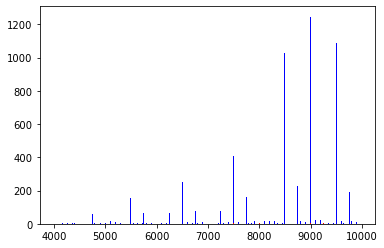

time: 1.23 s (started: 2021-09-01 23:55:23 +02:00)


In [104]:
plt.hist(numeric_df.loc[y_pred==1]["SalePrice"][numeric_df.loc[y_pred==1]["SalePrice"]<10000], bins=500, color="b", label="normal")
plt.hist(numeric_df.loc[y_pred==-1]["SalePrice"][numeric_df.loc[y_pred==-1]["SalePrice"]<10000], bins=500, color="r", label="anomalie")
plt.legend
plt.show()


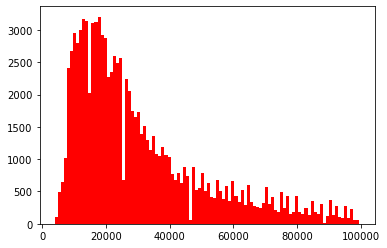

time: 310 ms (started: 2021-09-01 23:58:12 +02:00)


In [111]:
plt.hist(numeric_df.loc[y_pred==-1]["SalePrice"][numeric_df.loc[y_pred==-1]["SalePrice"]<100000], bins=100, color="b", label="anomalie")
plt.legend
#plt.show()
plt.hist(numeric_df.loc[y_pred==1]["SalePrice"][numeric_df.loc[y_pred==1]["SalePrice"]<100000], bins=100, color="r", label="anomalie")
plt.legend
plt.show()


In [ ]:
plt.hist(numeric_df.loc[y_pred==1]["SalePrice"], bins=20)
plt.title("normale")
plt.show()

In [ ]:
f=numeric_df[y_pred==1]
f[(f['ModelID']==6974) &(f['YearMade']==1968) ]

In [ ]:
f=numeric_df[y_pred==1]
f[f['YearMade']<0]

In [ ]:
(y_pred[y_pred==1]).shape

In [ ]:
plt.plot(y_pred, 'b.')

In [ ]:
neg_olf= clf.negative_outlier_factor_
plt.hist(neg_olf, bins=200)
plt.show

In [ ]:
def lof_algo(df_numeric, n_neighbors=20, contamination=0.1):
    for column in test_data.get_nbr_col():
    if test_data.profile[column]._emptiness!=0:
        print(test_data.profile[column]._emptiness)
        list_numeric_col_name.remove(column)
    clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
    y_pred = clf.fit_predict(np.asarray(df_numeric))

### Nan values fo MachineHoursCurrentMeter

In [ ]:
df_MHCM = df["MachineHoursCurrentMeter"]
df_MHCM.describe()

In [ ]:
len(df[df_MHCM.isnull()])

In [ ]:
df[df_MHCM.isnull()]

In [ ]:
len(df[df["ProductGroup"].isnull()])

In [ ]:
df_machine = df["MachineID"]
np.shape(np.unique(df_machine[df_machine.notna()], return_counts = True))

In [ ]:
df[df["MachineID"].isnull() == False]

In [ ]:
df_machine[df_machine.isnull()]

In [ ]:
df_Sales = df["SalesID"]
df_Sales[df_Sales.isnull()]

In [ ]:
df[df_Sales.isnull() & df_machine.isnull()]

### States study 

In [ ]:
len(df_State)

In [ ]:
df_State = df["state"]
np.unique(df_State)

In [ ]:
List_state_names = np.asarray(df.loc[:,'state'])
L_Texas = List_state_names[List_state_names == 'Texas']
L_Texa1 = List_state_names[List_state_names == 'TexaD']
L_Texa2 = List_state_names[List_state_names == 'TXxas']
L_Texa3 = List_state_names[List_state_names == 'TexPs']

In [ ]:
print(len(L_Texas), len(L_Texa1), len(L_Texa2), len(L_Texa3))

In [ ]:
List_state_names = np.asarray(df.loc[:,'state'])
L_Wash1 = List_state_names[List_state_names == 'WashingtoH']
L_Wash = List_state_names[List_state_names == 'Washington DC']
L_Wash2 = List_state_names[List_state_names == 'Washington']


In [ ]:
print(len(L_Wash), len(L_Wash1), len(L_Wash2))

## Histograms 
### Let's start with salesprice

In [ ]:
df.duplicated()

In [ ]:
df[(List_PSale > tree_std)*(List_PSale < t_std)].shape

In [ ]:
df_PSale > tree_std

In [ ]:
df_PSale = df['YearMade']
List_PSale = np.asarray(df_PSale[df_PSale.notna()])
tree_std = np.mean(List_PSale) - 3*np.std(List_PSale)
t_std = np.mean(List_PSale) + 3*np.std(List_PSale)
plt.hist(List_PSale[(df_PSale > tree_std)*(df_PSale < t_std)], bins = 200)
plt.show()

In [ ]:
List_PSale < t_std

In [ ]:
print(np.mean(np.asarray(df_PSale[df_PSale.notna()])),
        np.std(List_PSale))

In [ ]:
np.mean(List_PSale) - 3*np.std(List_PSale)

### Machine Hours Current Meter 

In [ ]:
df_machine = df.loc[:,'MachineHoursCurrentMeter']
List_Machine_H = np.asarray(df_machine[df_machine.notna()])

plt.hist(List_Machine_H[(0 < List_Machine_H)*(List_Machine_H< 5*1e4)], bins = 100)
plt.show()

### ModelID

In [ ]:
df_model = df.loc[:,'ModelID']
List_model = np.asarray(df_model[df_model.notna()])

plt.hist(List_model[List_model < 25*1e4], bins = 100)
plt.ylim(0,3500)
plt.show()

In [ ]:
len(np.unique(List_model))

$\rightarrow$ Les classes ne semble pas très homogènes...

### datasource

In [ ]:
df_dsource = df.loc[:,'datasource']
List_dsource = np.asarray(df_dsource[df_dsource.notna()])

plt.hist(List_dsource, bins = 100)
# plt.ylim(0,3500)
plt.show()

In [ ]:
len(List_dsource)

In [ ]:
np.unique(List_dsource)

In [ ]:
List_dsource

## None test

In [12]:
data  = df[["SalesID", "SalePrice", "MachineID", "ModelID","datasource", "auctioneerID", "YearMade", "MachineHoursCurrentMeter"]]

time: 7.14 ms (started: 2021-09-01 17:20:44 +02:00)


In [13]:
data

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
0,1139246.0,66000.0,999089.0,3157,121,3,2004,68.0
1,1139248.0,57000.0,117657.0,77,121,3,1996,4640.0
2,1139249.0,10000.0,434808.0,7009,121,3,2001,2838.0
3,1139251.0,38500.0,1026470.0,332,121,3,2001,3486.0
4,1139253.0,11000.0,1057373.0,17311,121,3,2007,722.0
...,...,...,...,...,...,...,...,...
99995,1417929.0,93500.0,26366.0,3357,132,6,1990,NaN
99996,1417930.0,47000.0,1412330.0,3357,132,9,1990,NaN
99997,1417931.0,47000.0,1412330.0,3357,132,9,1990,NaN
99998,1417934.0,48000.0,1412330.0,3357,132,9,1990,NaN


time: 14.6 ms (started: 2021-09-01 17:20:48 +02:00)


In [53]:
import numpy as np
import pandas as pd
import math as ma
import scipy.stats as st

def checks_input_mcar_tests(data):
    """ Checks whether the input parameter of class McarTests is correct

            Parameters
            ----------
            data:
                The input of McarTests specified as 'data'

            Returns
            -------
            bool
                True if input is correct
            """

    if not isinstance(data, pd.DataFrame):
        print("Error: Data should be a Pandas DataFrame")
        return False

    if not any(data.dtypes.values == np.float):
        if not any(data.dtypes.values == np.int):
            print("Error: Dataset cannot contain other value types than floats and/or integers")
            return False

    if not data.isnull().values.any():
        print("Error: No NaN's in given data")
        return False

    return True

class McarTests():

    def __init__(self, data):
        self.data = data

    def mcar_test(self):
        """ Implementation of Little's MCAR test

        Parameters
        ----------
        data: Pandas DataFrame
            An incomplete dataset with samples as index and variables as columns

        Returns
        -------
        p_value: Float
            This value is the outcome of a chi-square statistical test, testing whether the null hypothesis
            'the missingness mechanism of the incomplete dataset is MCAR' can be rejected.
        """

        if not checks_input_mcar_tests(self.data):
            raise Exception("Input not correct")

        dataset = self.data.copy()
        vars = dataset.dtypes.index.values
        n_var = dataset.shape[1]

        # mean and covariance estimates
        # ideally, this is done with a maximum likelihood estimator
        gmean = dataset.mean()
        gcov = dataset.cov()

        # set up missing data patterns
        r = 1 * dataset.isnull()
        mdp = np.dot(r, list(map(lambda x: ma.pow(2, x), range(n_var))))
        sorted_mdp = sorted(np.unique(mdp))
        n_pat = len(sorted_mdp)
        correct_mdp = list(map(lambda x: sorted_mdp.index(x), mdp))
        dataset['mdp'] = pd.Series(correct_mdp, index=dataset.index)

        # calculate statistic and df
        pj = 0
        d2 = 0
        for i in range(n_pat):
            dataset_temp = dataset.loc[dataset['mdp'] == i, vars]
            select_vars = ~dataset_temp.isnull().any()
            pj += np.sum(select_vars)
            select_vars = vars[select_vars]
            means = dataset_temp[select_vars].mean() - gmean[select_vars]
            select_cov = gcov.loc[select_vars, select_vars]
            mj = len(dataset_temp)
            parta = np.dot(means.T, np.linalg.solve(select_cov, np.identity(select_cov.shape[1])))
            d2 += mj * (np.dot(parta, means))

        df = pj - n_var

        # perform test and save output
        p_value = 1 - st.chi2.cdf(d2, df)

        return p_value

    def mcar_t_tests(self):
        """ MCAR tests for each pair of variables

        Parameters
        ----------
        data: Pandas DataFrame
            An incomplete dataset with samples as index and variables as columns

        Returns
        -------
        mcar_matrix: Pandas DataFrame
            A square Pandas DataFrame containing True/False for each pair of variables
            True: Missingness in index variable is MCAR for column variable
            False: Missingness in index variable is not MCAR for column variable
        """

        if not checks_input_mcar_tests(self.data):
            raise Exception("Input not correct")

        dataset = self.data.copy()
        vars = dataset.dtypes.index.values
        mcar_matrix = pd.DataFrame(data=np.zeros(shape=(dataset.shape[1], dataset.shape[1])),
                                   columns=vars, index=vars)

        for var in vars:
            for tvar in vars:
                part_one = dataset.loc[dataset[var].isnull(), tvar].dropna()
                part_two = dataset.loc[~dataset[var].isnull(), tvar].dropna()
                mcar_matrix.loc[var, tvar] = st.ttest_ind(part_one, part_two, equal_var=False).pvalue

        mcar_matrix = mcar_matrix[mcar_matrix.notnull()] > 0.05
        

        return mcar_matrix




time: 1.55 ms (started: 2021-09-01 18:43:33 +02:00)


In [54]:
isnon = utils._is_none(df_c, col_name="MachineHoursCurrentMeter")
isnon

0.7368936893689368

time: 544 ms (started: 2021-09-01 18:43:33 +02:00)


In [55]:
data  = df[["SalesID", "SalePrice", "MachineID", "ModelID","datasource", "auctioneerID", "YearMade", "MachineHoursCurrentMeter"]]
#data  = df[["SalesID", "SalePrice", "MachineID", "YearMade", "MachineHoursCurrentMeter"]]

time: 2.21 ms (started: 2021-09-01 18:43:34 +02:00)


In [56]:
test_Mac = McarTests(data)

time: 792 µs (started: 2021-09-01 18:43:34 +02:00)


In [57]:
test_Mac.mcar_t_tests()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
SalesID,False,True,True,True,True,True,True,False
SalePrice,True,False,True,True,False,True,True,False
MachineID,True,True,False,True,True,True,True,True
ModelID,False,False,False,False,False,False,False,False
datasource,False,False,False,False,False,False,False,False
auctioneerID,False,False,False,False,False,False,False,False
YearMade,False,False,False,False,False,False,False,False
MachineHoursCurrentMeter,False,False,False,False,False,False,False,False


time: 142 ms (started: 2021-09-01 18:43:34 +02:00)


In [59]:
#percentage of missing values in data
null_values_train = df_c.isnull().sum().sort_values(ascending=False)/len(df_c)*100

time: 107 ms (started: 2021-09-01 19:06:46 +02:00)


In [ ]:
# set up missing data patterns
r = 1 * dataset.isnull()
mdp = np.dot(r, list(map(lambda x: ma.pow(2, x), range(n_var))))
sorted_mdp = sorted(np.unique(mdp))
n_pat = len(sorted_mdp)
correct_mdp = list(map(lambda x: sorted_mdp.index(x), mdp))
dataset['mdp'] = pd.Series(correct_mdp, index=dataset.index)

In [ ]:
# calculate statistic and df
pj = 0
d2 = 0
for i in range(n_pat):
    dataset_temp = dataset.loc[dataset['mdp'] == i, vars]
    select_vars = ~dataset_temp.isnull().any()
    pj += np.sum(select_vars)
    select_vars = vars[select_vars]
    means = dataset_temp[select_vars].mean() - gmean[select_vars]
    select_cov = gcov.loc[select_vars, select_vars]
    mj = len(dataset_temp)
    parta = np.dot(means.T, np.linalg.solve(select_cov, np.identity(select_cov.shape[1])))
    d2 += mj * (np.dot(parta, means))


In [ ]:
df = pj - n_var

In [ ]:
# perform test and save output
p_value = 1 - st.chi2.cdf(d2, df)

In [ ]:
ataset = data
vars = dataset.dtypes.index.values
mcar_matrix = pd.DataFrame(data=np.zeros(shape=(dataset.shape[1], dataset.shape[1])),
                           columns=vars, index=vars)

for var in vars:
    for tvar in vars:
        part_one = dataset.loc[dataset[var].isnull(), tvar].dropna()
        part_two = dataset.loc[~dataset[var].isnull(), tvar].dropna()
        mcar_matrix.loc[var, tvar] = st.ttest_ind(part_one, part_two, equal_var=False).pvalue

mcar_matrix = mcar_matrix[mcar_matrix.notnull()] > 0.05

mcar_matrix